# Diplomado Inteligencia Artificial y Aprendizaje Profundo

## Universidad Nacional de Colombia

### Mayo 21 de 2021

# **Sistema de recomendaciones de compra basado en un modelo de Asignación Latente de Dirichlet (LDA)**

### Autores

* Andrea Valencia Orozco (andval9426@gmail.com)
* Andrés Camilo Murcia (andrescami55@gmail.com)
* Diana Carolina Cárdenas  (dccardenasr@unal.edu.co)

## 1. Introducción

Actualmente las compañías productoras y comercializadoras de bienes y servicios se han enfrentado a la realidad de anticiparse a las necesidades de sus clientes, sumado a esto, también tienen que manejar apropiadamente el gran volumen de información que dichos clientes aportan a través de sus compras. 

Una ventaja competitiva es establecer estrategias específicas según los tipos de clientes y poder llegar a tiempo para suplir los requerimientos de estos. Es por esto que compañías como Netflix, Amazon, entre otras, fortalecen sus sistemas de recomendaciones basados en los hábitos, preferencias y consultas que los diferentes usuarios aportan día a día. 

Para el caso del presente trabajo se cuenta con facturas de compra de diferentes establecimientos comerciales que se abastecen de alimentos, bebidas alcohólicas y no alcohólicas, para los cuales se propone un sistema de recomendaciones en el que se analiza de manera eficiente cuáles son los productos más asociados a las diferentes tiendas y además se establecen grupos de productos que en el desarrollo de este proyecto se denominan *tópicos*.

Para lograr esto, se toma como base un modelo generativo del
aprendizaje automático (machine learning) llamado LDA (Latent Dirchlet Allocation), con la cual es posible identificar los tópicos más importantes, graficar la relación entre ellos y hacer predicciones de los productos recomendados para clientes nuevos y antiguos. 

Por el criterio de *perplexity* se seleccionaron 4 tópicos principales, los cuales contienen los productos más relevantes reportados por los establecimientos comerciales.

[Latent Dirichlet Allocation Paper](https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)

## 2. Técnicas de procesamiento de Lenguaje Natural

### 2.1. Conceptos clave:
* Documentos: Conjunto de palabras.
* Corpus: Conjunto de documentos.
* Tópico: Conjunto de palabras relacionadas por referirse a un tema en común.

### 2.2. Modelamiento Latent Dirichlet Allocation (LDA)

El método LDA es un modelo probabilístico generativo que permite explicar las similitudes en un conjunto de textos, utilizando grupos no observados. Los conjuntos de observaciones son las palabras recogidas en los documentos, donde cada documento es una mezcla de un pequeño número de tópicos. La creación de cada palabra se atribuye a uno de los tópicos del documento. El modelo LDA trabaja bajo el supuesto de que los tópicos presentes en la colección de
documentos que se está analizando no necesariamente están relacionados y por consiguiente no dependen entre ellos. Para extraer la estructura de tópicos presente en una colección, este modelo hace uso de un modelo estadístico de generación de documentos, tópicos y palabras a lo largo del tiempo que abarque ésta (Blei D, 2012).

Para cada documento presente en un corpus, se realiza los siguientes procesos (Blei D, 2012):

1. Se define una distribución aleatoria para la presencia de los tópicos en el corpus y una distribución para la presencia de las palabras para cada tópico que se desea encontrar.
2. Luego, por cada palabra presente en el documento bajo análisis se debe:
a) Escoger un tópico aleatoriamente haciendo uso de la distribución generada en el paso anterior. b) Escoger una palabra del documento aleatoriamente a partir de la distribución del vocabulario en relación al tópico escogido.

Para determinar la estructura de tópicos existente luego del proceso de generación, es necesario calcular las distribuciones condicionales entre los tópicos y sus documentos, el cual es un problema, debido a que la cantidad de estructuras que pueden representar una colección de documentos crece exponencialmente en relación a la cantidad de documentos y palabras presente en
esta (Blei D, 2012).

Este proceso es descrito a continuación (Blei D, 2012):

1. Se decide el número de palabras N que tendrá el documento M (Por ejemplo de acuerdo a una distribución Poisson (φ)).
2. Escoger θ ~ Dirichlet(α). Se elige una mezcla de tópicos para el documento (de acuerdo a una distribución Dirichlet sobre un conjunto fijo de K tópicos).
3. Por cada una de las N palabras, generar wi.

a) Escoger un tópico zd ~ Multinomial(θ). 

b) Elegir una palabra wi para p(wi|zn,β)


## 3. Descripción del conjunto de datos

El dataset corresponde a las compras llevadas a cabo por clientes (tiendas y establecimientos), para un total de 1'352.921 registros de compra, para los cuales se tienen las siguientes variables:

3.1. Variables

- ID Contacto: Código de cliente asignado por la compañía. (Tipo String)
- Timestamp: Fecha de la compra. (Tipo Date)
- lD orden: Código de la factura. (Tipo String)
- ID Producto: Código de producto asignado por la compañía. (Tipo String)
- Cantidad: Número de unidades compradas. (Tipo Integer)
- Unidad: Unidad de medida. (Tipo String)

3.2. Productos

Los establecimientos se abastecieron de productos como alimentos, bebidas gaseosas, cervezas, aguas, jugos, entre otros, los cuales componen en total 2108 productos.

3.3. Tiendas

En la práctica, los establecimientos evaluados se clasifican en tiendas de barrio, supermercados, bares, cafeterías, entre otros, sin embargo, en la información compartida por la compañía no se incluye esa clasificación.

3.4. Tiempo de estudio

La información aportada corresponde a las compras de la compañía durante el mes de diciembre de 2020. 


## 4. Planteamiento del problema

Existe un grado alto de incertidumbre en los pedidos de productos que la compañia debe despachar a las tiendas. Esto se debe a que no existe un análisis cercano de las tendencias y el mix de productos que estos acostumbran a manejar. Adicionalmente, no se ha realizado una clasificación de los negocios (aparte de su razón social), basado en los productos que históricamente ha solicitado.

De esta manera, el objetivo es tener una estrategia de mercadeo y de abastecimiento para los clientes (tiendas y establecimientos). Así, se desea crear un sistema de recomendaciones a través del análisis de los códigos de productos adquiridos por dichos clientes, basado en registros históricos de compras.

La técnica de modelamiento de LDA, permite realizar el análisis de cada cliente asumiéndolo como un documento, donde cada palabra será el código del producto que ha comprado en un rango de tiempo determinado. Así, podrán hacerse las asociaciones reales de los productos a los establecimientos y se propondrá un set de códigos que seguramente los clientes necesitarán para surtir sus negocios. Esto garantizará un mejor manejo en stock y distribución de los diferentes tipos de productos en el mercado.




## 5. Implementación Modelamiento LDA

A continuación se presentan las siguientes líneas de código, en donde se implementa la técnica de modelamiento de LDA en Python.

[Documentation Latent Dirichlet Allocation (LDA)](https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0)

### 5.1. Importación de librerías

In [ ]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import re
import glob
from seaborn import load_dataset
from gensim import corpora, models
from gensim.test.utils import datapath

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

### 5.2. Lectura de archivos

In [ ]:
from google.colab import drive
import glob
drive.mount('/content/gdrive')

ruta = 'gdrive/MyDrive/Proyecto IA/Ratail/Online Retail.xlsx'
pathCSV_catalog = 'gdrive/MyDrive/Proyecto IA/catalogo/catalog_bis.csv'


# Crea Dataframe con todos los CSV de la ruta
array_frems = []
for filePath in glob.glob('gdrive/MyDrive/Proyecto IA/*.csv'):
  frem_step = pd.read_csv(filePath, sep=";")
  array_frems.append(frem_step)

pathCSV_txns = pd.concat(array_frems) 

# Crea el frem_catalog con la descripción de los productos
frem_catalog = pd.read_csv(pathCSV_catalog, sep=";")

# Agrupa por ID de producto y Descripción. Arroja el tamaño.
group_catalog = frem_catalog.groupby(['ID de producto', 'Descripción'], as_index=False).size()


Mounted at /content/gdrive


In [ ]:
# Vista de datos de entrada
pathCSV_txns.head()

,ID Contacto,Timestamp,ID Orden,ID Producto,Cantidad,Unidad
0,343736,"2,02012E+13",1123239225,173742,48.0,LT
1,343736,"2,02012E+13",1123239225,65895,12.0,BOT
2,343736,"2,02012E+13",1123239225,69954,6.0,BOT
3,343736,"2,02012E+13",1123239225,35222,24.0,BOT
4,343736,"2,02012E+13",1123239225,131972,24.0,BOT


In [ ]:
# Esquema ejemplo de corpus que se utilizará para el procesamiento

#corpues = [
#   '16008 17021 20665 20719 20780 20782 20966 21035 21041 21064 21154 21171 21265 21578 21636 21731 21791 21832 21975 21976 22131 22134 22195 22196 22212 22252 22371 22372 22374 22375 22376 22417 22422 22423 22432 22492 22494 22497 22550 22561 22621 22697 22698 22699 22725 22726 22727 22728 22729 22771 22772 22773 22774 22775 22805 22821 22945 22992 23076 23084 23146 23147 23162 23170 23171 23172 23173 23174 23175 23177 23271 23297 23308 23316 23420 23421 23422 23480 23497 23503 23506 23508 23552 47580 71477 84969 84991 84992 85116 85178 47559B 47567B 51014C 84558A 84559A 84559B 84625A 84625C 84997B 84997C 84997D 85167B 85232D',
#   '21211 21213 21725 21726 21967 21977 21980 21981 21982 21983 21985 22437 22616 22951 22952 23076 23077 23078 84988 84991 84992',
#   '20685 20914 21086 21136 21231 21232 21411 21531 21533 21535 21563 21564 21787 22059 22064 22070 22071 22131 22195 22326 22333 22423 22430 22441 22553 22554 22555 22556 22557 22567 22601 22666 22692 22704 22720 22722 22832 22960 23020 23108 23112 23113 23198 23236 23240 23253 23263 23273 23283 23293 23294 23295 23296 23439 23460 23493 23494 23497 23514 23545 35970 37448 37500 48184 48185 48194 84978 85053 47504H 84078A 85014A 85014B',
#   '20615 20652 21171 21832 21864 21866 21908 21915 22348 22412 22551 22557 22620 79066K 79191C 84086C',
#   '21232 21314 21380 21669 21700 21731 21754 21755 21756 21770 21914 22064 22120 22138 22178 22413 22423 22550 22617 22624 22627 22630 22634 22635 22645 22646 22654 22668 22692 22701 22720 22722 22779 22780 22784 22801 22844 22853 22978 22979 22980 22982 22993 23088 23089 23096 23198 23243 23245 23298 23367 23368 23559 37448 37495 84050 84510A',
#]
#labels = [12347, 12349, 12350, 12352, 12352]

### 5.3. Creación de documento de pre-procesamiento

In [ ]:
join_frem = pathCSV_txns.merge(frem_catalog, how="left",  left_on=["ID Producto"], right_on=["ID de producto"])
end_frem_with_desc =  join_frem[['ID Contacto', 'ID de producto', 'Descripción']]

end_frem = join_frem[['ID Contacto', 'ID de producto']].sort_values(by=['ID Contacto'], ascending=False)
dictValues = end_frem.groupby('ID Contacto')['ID de producto'].apply(list).to_dict()

labels = []
corpus = []
for key, value in dictValues.items():
  labels.append(key)
  corpus.append(' '.join(map(str,value)))

# Crear index para cada documento
documents = pd.DataFrame(corpus, columns=["ids_productos"])
documents['index'] = documents.index


### 5.4. Preprocesamiento de palabras

Dado que no se utilizan letras en el corpus, no se requiere realizar una limpieza profunda de los datos.

In [ ]:
# Definición de fnción para preprocesamiento
def preprocess(text):
    result = []
    for pr in text.split(" "):
      result.append(str(pr))
    return result

In [ ]:
# Ejecución de la función preprocess en todo el dataset
processed_docs = documents['ids_productos'].map(preprocess)

### 5.4. Aplicación GENSIM y CORPORA

Este módulo implementa el concepto de Diccionario: un mapeo entre palabras y sus ID enteros. El diccionario encapsula el mapeo entre palabras normalizadas y sus ID enteros.

In [ ]:
# Creación del diccionario en formato corpora
dictionary = gensim.corpora.Dictionary(processed_docs)

# Ejemplo de los 10 primeros items de productos
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 1
1 100197
2 123555
3 126483
4 134988
5 150737
6 150739
7 150759
8 155663
9 165107
10 169574


### 5.5. Aplicación de Gensim Doc2Bow
La función doc2bow() simplemente cuenta el número de apariciones de cada palabra distinta, convierte la palabra en su id de palabra entera y devuelve el resultado como un vector disperso.




In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
# Muestra
print(f"Muestra {bow_corpus[0]}")
# Tamaño
print(f"tamaño {len(bow_corpus)}")

Muestra [(0, 3), (1, 3), (2, 1), (3, 3), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 2), (18, 1), (19, 1), (20, 2), (21, 2), (22, 1), (23, 1), (24, 2)]
tamaño 13844


In [ ]:
# Ejemplo con la tienda de índice(posición en los labels) == 4310
# El resultado es un listado de tuplas ("id_palabra", frecuencia)

bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 0 ("1") appears 2 time.
Word 8 ("155663") appears 1 time.
Word 9 ("165107") appears 1 time.
Word 14 ("183635") appears 1 time.
Word 21 ("64561") appears 1 time.
Word 29 ("150476") appears 1 time.
Word 34 ("128188") appears 3 time.
Word 35 ("174981") appears 1 time.
Word 48 ("144308") appears 2 time.
Word 49 ("164851") appears 1 time.
Word 63 ("150428") appears 2 time.
Word 65 ("155668") appears 1 time.
Word 66 ("157859") appears 1 time.
Word 71 ("164478") appears 1 time.
Word 73 ("164933") appears 2 time.
Word 79 ("180826") appears 1 time.
Word 82 ("182738") appears 2 time.
Word 94 ("64344") appears 1 time.
Word 97 ("64347") appears 1 time.
Word 98 ("65895") appears 1 time.
Word 101 ("83040") appears 2 time.
Word 104 ("131972") appears 3 time.
Word 105 ("134987") appears 2 time.
Word 111 ("150390") appears 1 time.
Word 120 ("151753") appears 1 time.
Word 121 ("151754") appears 2 time.
Word 122 ("151755") appears 1 time.
Word 123 ("151756") appears 2 time.
Word 124 ("154575") appea

### 5.6. Cálculo de TF-IDF basado en Bow_Corpus

Para efectos de esta investigación, se consideran todos los códigos de producto como palabras relevantes, debido a que las necesidades del negocio requieren que dentro de las sugerencias ofrecidas a las tiendas se encuentren los productos necesarios, aunque sean productos de alta demanda en la mayoría de establecimientos.

In [ ]:
#TF número de veces que se repite un termino en un documento
#IDF es el logaritmo del número de documento en un elemento dato 

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break  

[(0, 0.14079330484169655),
 (1, 0.48208862625235066),
 (2, 0.10493551304798378),
 (3, 0.5036848584343201),
 (4, 0.11438064219704272),
 (5, 0.12341999477790386),
 (6, 0.1337883825237637),
 (7, 0.1375425752878004),
 (8, 0.09677998364667251),
 (9, 0.07521300131883557),
 (10, 0.0930229944354692),
 (11, 0.10186992389421738),
 (12, 0.11047672168133423),
 (13, 0.11365425683173602),
 (14, 0.0828506709275399),
 (15, 0.17265483875398815),
 (16, 0.20882710111885863),
 (17, 0.10325544481006377),
 (18, 0.1428981414211848),
 (19, 0.1127371677456956),
 (20, 0.29020798270164894),
 (21, 0.10227614619998641),
 (22, 0.05857083120723656),
 (23, 0.14476302808303754),
 (24, 0.34000998504610097)]


### 5.7. Modelamiento LdaMulticore

**Parámetros**

*corpus:* Correspinde a los vectores de los documentos, representados como las tuplas de los id de los productos junto con su frecuencia en dicho documento. Esto se realizó en el numeral "5.5. Aplicación de Gensim Doc2Bow".

*workers:* Número de nodos de cómputo a ser usados en procesamiento paralelizado.

*id2work:* Diccionario que mapea los identificadores de las palabras. Se usa para determinar el tamaño del vocabulario, al igual que para realizar prueba de errores (debugging) y definición de tópicos.

*num_topic:* Número de tópicos para agrupación de palabras.




Se truncaron las últimas líneas 5000 del resultado de transmisión.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sco

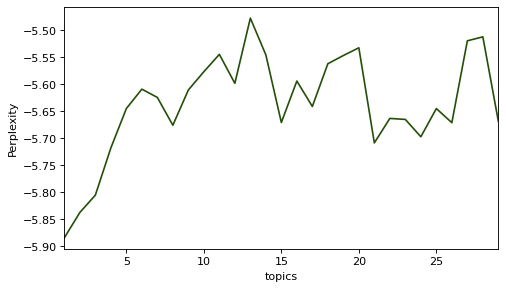

In [ ]:
# parameter_list determina el número de tópicos en cada evaluación del modelo
parameter_list = range(1, 30)
grid ={}

for parameter_value in parameter_list:
  model = models.LdaMulticore(corpus=bow_corpus, workers=3, id2word=dictionary, 
                            num_topics=parameter_value)
  grid[parameter_value]=[]
  perplex=model.log_perplexity(bow_corpus, total_docs=len(bow_corpus))
  grid[parameter_value].append(perplex)


df = pd.DataFrame(grid)
ax = plt.figure(figsize=(7, 4), dpi=80).add_subplot(111)
df.iloc[0].transpose().plot(ax=ax,  color="#254F09")
plt.xlim(parameter_list[0], parameter_list[-1])
plt.ylabel('Perplexity')
plt.xlabel('topics')
plt.show()

### 5.8. Ejecución del modelo seleccionado

In [ ]:
#----------------------------------------------------------------
# Nota: Si se tiene ya un modelo guardado previamente, entonces, no ejecutar esta celda.
#----------------------------------------------------------------
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus, workers=3, id2word=dictionary, 
                            num_topics=4)

# Medida de Log-Perplexity
lda_model.log_perplexity(bow_corpus, total_docs=processed_docs.size )

Se truncaron las últimas líneas 5000 del resultado de transmisión.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sco

-5.73455569845198

In [ ]:
# Salvando el modelo elegido N tópicos 
#Declara nombre de modelo.
NOMBRE_MODELO = "lda_model_4topics"
temp_file = datapath(f"/content/gdrive/MyDrive/Proyecto IA/{NOMBRE_MODELO}")

# Descomentar en caso de que se quiera ejecutar y guardar un nuevo modelo
#lda_model.save(temp_file)

# Carga en memoria el modelo ya procesado
lda_model_ld = lda_model.load(temp_file)


/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is

In [ ]:
topic_dic = {}
for idx, topic in lda_model_ld.print_topics(-1):
    word = topic.split("+")
    valIn = []
    for w in word:
      splitWord = w.split("*")
      #miTuple = tuple(splitWord)
      valIn.append(' - '.join(map(str,splitWord)))
      #valIn.append(splitWord)
    topic_dic.update({idx:valIn})
    #print('Topic: {} \nWords: {}'.format(idx, topic))
df = pd.DataFrame.from_dict(topic_dic.items(), orient='columns')
df.columns = ['index_col','topics']


In [ ]:
frem_pre = df.set_index('index_col', append=True)['topics']\
  .apply(pd.Series).stack().reset_index(level=-1, drop=True)\
  .to_frame(name='topics')
frem_pre = frem_pre.reset_index()

In [ ]:
frem_pre[['percent', 'product']] = frem_pre['topics'].str.split('\s+-\s+', expand=True)


<input>:1: DeprecationWarning: invalid escape sequence \s
<ipython-input-34-67811e9f24a6>:1: DeprecationWarning: invalid escape sequence \s
  frem_pre[['percent', 'product']] = frem_pre['topics'].str.split('\s+-\s+', expand=True)


In [ ]:
# Impresión de los tópicos y sus puntuaciones por cada producto
for idx, topic in lda_model_ld.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.037*"1" + 0.032*"30" + 0.031*"64561" + 0.030*"67907" + 0.013*"169574" + 0.013*"128188" + 0.012*"169590" + 0.011*"179192" + 0.010*"165107" + 0.009*"169592"
Topic: 1 Word: 0.016*"64561" + 0.016*"1" + 0.014*"30" + 0.013*"65895" + 0.011*"164851" + 0.011*"67907" + 0.011*"131972" + 0.011*"50469" + 0.010*"173742" + 0.010*"35221"
Topic: 2 Word: 0.017*"50469" + 0.017*"63352" + 0.016*"180511" + 0.016*"102316" + 0.015*"65895" + 0.013*"180523" + 0.012*"164851" + 0.011*"164478" + 0.010*"164322" + 0.010*"150428"
Topic: 3 Word: 0.013*"65895" + 0.013*"35221" + 0.013*"166116" + 0.012*"167699" + 0.012*"150428" + 0.012*"151754" + 0.012*"29" + 0.012*"151753" + 0.012*"173742" + 0.011*"35222"


In [ ]:
# Prueba de un registro del bow_corpus (salida: score, tópico y puntuaciones de las palabras en el tópico asignado)

tienda = 431

for index, score in sorted(lda_model[bow_corpus[tienda]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nNumero Topico: {} \t \nTopic: {}".format(score, index, lda_model.print_topic(index, 10)))


Score: 0.9573807120323181	 
Numero Topico: 0 	 
Topic: 0.037*"1" + 0.032*"30" + 0.031*"64561" + 0.030*"67907" + 0.013*"169574" + 0.013*"128188" + 0.012*"169590" + 0.011*"179192" + 0.010*"165107" + 0.009*"169592"

Score: 0.014413689263164997	 
Numero Topico: 1 	 
Topic: 0.016*"64561" + 0.016*"1" + 0.014*"30" + 0.013*"65895" + 0.011*"164851" + 0.011*"67907" + 0.011*"131972" + 0.011*"50469" + 0.010*"173742" + 0.010*"35221"

Score: 0.014178727753460407	 
Numero Topico: 3 	 
Topic: 0.013*"65895" + 0.013*"35221" + 0.013*"166116" + 0.012*"167699" + 0.012*"150428" + 0.012*"151754" + 0.012*"29" + 0.012*"151753" + 0.012*"173742" + 0.011*"35222"

Score: 0.014026908203959465	 
Numero Topico: 2 	 
Topic: 0.017*"50469" + 0.017*"63352" + 0.016*"180511" + 0.016*"102316" + 0.015*"65895" + 0.013*"180523" + 0.012*"164851" + 0.011*"164478" + 0.010*"164322" + 0.010*"150428"


## 6. Análisis de resultados


### 6.1. Visualización de Palabras Clave de los Tópicos
Para tener una visualización clara de los tópicos y sus palabras claves, se utilizó la librería pyLDAvis, que permite de una forma simple e interactiva analizar los resultados obtenidos.

In [ ]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6MB 31.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=1239e5520d56f48cc50eb113dc9ddb28f5f0c70304263cbf4d1b4d7679e926e4
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
# Importar las librerías
import gensim
import pyLDAvis
import pyLDAvis.gensim


# Función para la visualización de los tópicos y sus temas relevantes
lda_visualization = pyLDAvis.gensim.prepare(lda_model_ld, bow_corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_visualization)

### 6.2. Tópicos hallados

In [ ]:
# Construcción de entregable con Tópicos y palabras asociadas
frem_pre['product'] = frem_pre['product'].str.replace('"','')
frem_pre['product'] = frem_pre['product'].apply(pd.to_numeric)
end_frem_with_desc['ID de producto'] = pd.to_numeric(end_frem_with_desc['ID de producto'])
basedf = pd.DataFrame(
  frem_pre,  
	columns=['level_0', 'index_col', 'topics', 'percent', 'product'])
df_unido = basedf.merge(end_frem_with_desc, how="right",  left_on=['product'], right_on=['ID de producto'])
df_unido = df_unido.dropna()
df_unido2 = df_unido.groupby(['level_0', 'ID de producto', 'Descripción'], as_index=False).size()

# Export de entregable
df_unido2.to_csv('/content/gdrive/MyDrive/Colab Notebooks/df_unido2_topics4.csv', sep=',')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.



De los tópicos hallados se pueden distinguir los grupos de productos asociados respecto a si el envase es de vidrio, lata o plástico. Adicionalmente se distiguen si son productos clásicos, premium o de bajas calorías.

Para los datos analizados se encontraron los siguientes tópicos principalmente:

1. Tópico 0: Mayor presencia de cervezas clásicas en presentaciones personales (350 ml) en botella de vidrio, al igual que amplio mix de bebidas de té de sabores surtidos en presentaciones personales (350 ml) en botella de vidrio.
1. Tópico 1: Predominancia de cervezas clásicas, además, cervezas bajas en calorías, de presentaciones de máximo 1 litro en botella de vidrio. En menor medida, manejo de algunos items de gaseosas oscuras, energizantes (en packs de 12 unidades) y bebidas de té.
1. Tópico 2: Predominancia de gaseosas oscuras de máximo 2.5 litros en botella de plástico. En la misma medida se presentan bebidas de té de sabores surtidos de 2.5 litros en botella de plástico. En menor medida se ecuentra asociado a bebidas energizantes (en packs de 12 unidades) de 600 ml.
1. Tópico 3: Amplia variedad de cervezas en lata. Presencia de cervezas clásicas de 1 litro en botella de vidrio. En menor medida se presentan bebidas energizantes (en packs de 12 unidades) de contenido de 600 ml.



## 7. Consultas y actualización del modelo

El objetivo de esta sección es ejecutar el modelo sobre un set de datos que no fueron usados en el entrenamiento. Para el caso en desarrollo, corresponden a las compras realizadas por unas tiendas específicas, con el que pueda asociarse un tópico determinado, y así, identificar qué productos pueden sugerirse a las tiendas en futuras oportunidades para promover la compra y anticiparse a las necesidades de los clientes. A continuación se detalla el paso a paso de la ejecución de esta consulta:

In [ ]:
# Carga de los datos de prueba o datos nuevos

data_prueba = pd.read_csv('/content/gdrive/MyDrive/Proyecto IA/data_prueba.csv', sep=";")
data_prueba

In [ ]:
# Creación del de documento para pre-procesamiento de los datos de prueba
end_frem_pred = data_prueba[['ID Contacto', 'ID Producto']].sort_values(by=['ID Contacto'], ascending=False)
dictValues = end_frem_pred.groupby('ID Contacto')['ID Producto'].apply(list).to_dict()

labels_pred = []
corpus_pred = []
for key, value in dictValues.items():
  labels_pred.append(key)
  corpus_pred.append(' '.join(map(str,value)))

# Crear index para cada documento
documents_pred = pd.DataFrame(corpus_pred, columns=["ids_productos"])
documents_pred['index'] = documents_pred.index

In [ ]:
# Pre-procesamiento de palabras
processed_docs_pred = documents_pred['ids_productos'].map(preprocess)

# Longitud del diccionario base
len(dictionary)

1449

In [ ]:
# Creación del Bow-Corpus de predicción
bow_corpus_pred = [dictionary.doc2bow(doc) for doc in processed_docs_pred]
# Muestra
print(f"Muestra {bow_corpus_pred[0]}")
# Tamaño
print(f"tamaño {len(bow_corpus_pred)}")

Muestra [(42, 1)]
tamaño 30


In [ ]:
# Actualización del modelo con la nueva data
lda_model_ld.update(bow_corpus_pred)

# Cálculo de frecuencias de cada elemento del nuevo conjunto de datos
vector = lda_model_ld[unseen_doc]
vector

In [ ]:
# Cálculo del Score para los tópicos más asociados a una palabra(producto)
tienda = 10
for index, score in sorted(lda_model_ld[bow_corpus_pred[tienda]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nNumero Topico: {} \t \nTopic: {}".format(score, index, lda_model.print_topic(index, 10)))


Score: 0.6109632253646851	 
Numero Topico: 0 	 
Topic: 0.037*"1" + 0.032*"30" + 0.031*"64561" + 0.030*"67907" + 0.013*"169574" + 0.013*"128188" + 0.012*"169590" + 0.011*"179192" + 0.010*"165107" + 0.009*"169592"

Score: 0.13039341568946838	 
Numero Topico: 3 	 
Topic: 0.013*"65895" + 0.013*"35221" + 0.013*"166116" + 0.012*"167699" + 0.012*"150428" + 0.012*"151754" + 0.012*"29" + 0.012*"151753" + 0.012*"173742" + 0.011*"35222"

Score: 0.13024801015853882	 
Numero Topico: 1 	 
Topic: 0.016*"64561" + 0.016*"1" + 0.014*"30" + 0.013*"65895" + 0.011*"164851" + 0.011*"67907" + 0.011*"131972" + 0.011*"50469" + 0.010*"173742" + 0.010*"35221"

Score: 0.12839539349079132	 
Numero Topico: 2 	 
Topic: 0.017*"50469" + 0.017*"63352" + 0.016*"180511" + 0.016*"102316" + 0.015*"65895" + 0.013*"180523" + 0.012*"164851" + 0.011*"164478" + 0.010*"164322" + 0.010*"150428"


## 8. Conclusiones

La propuesta del sistema de recomendaciones permite anticiparse al comportamiento de los establecimientos respecto a sus compras de los productos en estudio. De los tópicos hallados se distinguen cuatro (4), que van desde los más inclinados a los productos de bebidas gaseosas y bebidas de té en sus diferentes sabores y  envases, hasta los tópicos de mayor afinidad con cervezas de diferentes presentaciones.

Se sugiere además, realizar una actualización de modelo, cada tres o seis meses, incluyendo las nuevas compras de los clientes habituales y de los nuevos clientes que se han ido añadiendo. Si bien, el modelo LDA es ampliamente utilizado, no es la única vía para la detección de tópicos. Sería interesante, para futuros proyectos, comparar estos resultados con otras técnicas (como Word2Vec ó FastText).

De esta manera, para un establecimiento nuevo, con por lo menos un mes de facturación, es posible recomendarle los productos con mayor relación a su comportamiento y promover la compra de una manera más efectiva.

Es importante enfatizar que, los resultados obtenidos pueden enriquecerse con el conocimiento de los especialistas en las áreas de negocio de la compañía. Así, se establecerán estrategias efectivas de precios, presentaciones, distribución y publicidad de los productos ofrecidos. 

## 9. Referencias

- Blei, D. M. (2012). *Probabilistic topic models. Communications of the ACM*, 55(4), 77-84.

- Latent Dirichlet allocation. (2017, agosto). *En Wikipedia*. https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation

- GeeksforGeeks. (2017, 23 mayo). *Tokenize text using NLTK in python*. https://www.geeksforgeeks.org/tokenize-text-using-nltk-python/?ref=rp

- Gensim: topic modelling for humans. (s. f.). Https://Radimrehurek.Com/Gensim/Models/Ldamulticore.Html. Recuperado 18 de mayo de 2021, de https://radimrehurek.com/gensim/models/ldamulticore.html

- Řehůřek’s, R. (2014, 21 septiembre). Multicore LDA in Python: from over-night to over-lunch | RARE Technologies. Https://Rare-Technologies.Com/Multicore-Lda-in-Python-from-over-Night-to-over-Lunch/. https://rare-technologies.com/multicore-lda-in-python-from-over-night-to-over-lunch/


